<a href="https://colab.research.google.com/github/tubagokhan/RegNLPDataset/blob/main/RIRAG_Evaluation_Question_Answer_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import json
import random

def merge_filter_and_shuffle_json_files(directory, output_file):
    # Initialize an empty list to store the merged and filtered data
    merged_data = []

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file ends with "_Annotated_Samples.json"
        if filename.endswith("_Annotated_Samples.json"):
            file_path = os.path.join(directory, filename)
            # Read and load the JSON data from the file
            with open(file_path, 'r') as f:
                data = json.load(f)
                for item in data:
                    # Check if "Expected" is True
                    if item.get("Expected") is True:
                        # Remove the "Expected" key
                        item.pop("Expected", None)

                        # Filter passages where "Relation" is equal to 1
                        filtered_passages = [
                            {key: value for key, value in passage.items() if key != "Relation"}
                            for passage in item.get("Passages", [])
                            if passage.get("Relation") == 1
                        ]

                        # Replace the original "Passages" with the filtered ones
                        item["Passages"] = filtered_passages

                        # Only keep the item if there are passages left after filtering
                        if len(item["Passages"]) > 0:
                            merged_data.append(item)

    # Shuffle the merged data
    random.shuffle(merged_data)

    # Write the merged, filtered, and shuffled data to the output file
    with open(output_file, 'w') as output_f:
        json.dump(merged_data, output_f, indent=4)

    print(f"Merged, filtered, and shuffled {len(merged_data)} records into {output_file}")

# Example usage
directory_path = '/content/drive/Othercomputers/MBZUAI/MBZUAI/ADGM-Project/Sources/AnnotatedSilverQA'  # Replace with your directory path
output_file_path = 'Shared_Task_Evaluaton_Golden_Question_Answer_Dataset_HIDDEN.json'  # Replace with your output file path

merge_filter_and_shuffle_json_files(directory_path, output_file_path)


Merged, filtered, and shuffled 860 records into Shared_Task_Evaluaton_Golden_Question_Answer_Dataset_HIDDEN.json


In [24]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def analyze_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    total_items = len(data)
    passages_count = defaultdict(int)

    for item in data:
        if "Passages" in item:
            passage_length = len(item["Passages"])
            passages_count[passage_length] += 1

    print(f'Total number of items in the JSON file: {total_items}')
    for passage_length, count in passages_count.items():
        print(f'{count} Passages items include {passage_length} items')

    # Sort the data by passage length for better visualization
    sorted_passages = dict(sorted(passages_count.items()))

    # Plotting the data
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_passages.keys(), sorted_passages.values(), color='skyblue')

    # Adding titles and labels
    plt.title('Distribution of Obligations')
    plt.xlabel('Number of Passages/Obligations')
    plt.ylabel('Number of Questions')
    plt.xticks(list(sorted_passages.keys()))

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

    # Show the plot
    plt.show()




Total number of items in the JSON file: 860
347 Passages items include 1 items
134 Passages items include 3 items
339 Passages items include 2 items
9 Passages items include 5 items
26 Passages items include 4 items
5 Passages items include 6 items


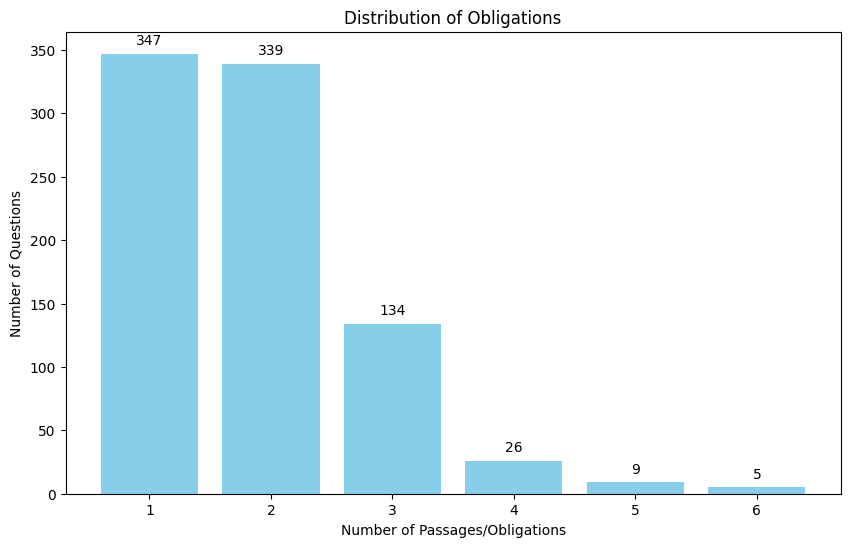

In [25]:
# Example usage
file_path = output_file_path  # Replace with your file path
analyze_json(file_path)


In [26]:
import json

def extract_questions(file_path, output_file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract only "QuestionID" and "Question"
    extracted_data = [{"QuestionID": item["QuestionID"], "Question": item["Question"]} for item in data if "QuestionID" in item and "Question" in item]

    # Write the extracted data to a new JSON file
    with open(output_file_path, 'w') as output_file:
        json.dump(extracted_data, output_file, indent=4)

    print(f'Extracted {len(extracted_data)} questions into {output_file_path}')

# Example usage
input_file_path = output_file_path  # Replace with your input file path
output_file_path = 'Shared_Task_Evaluaton_Golden_Question_Dataset.json'  # Replace with your output file path

extract_questions(input_file_path, output_file_path)


Extracted 860 questions into Shared_Task_Evaluaton_Golden_Question_Dataset.json
